In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
import matplotlib
import numpy as np
import os
from PIL import Image
from keras.optimizers import SGD
import cv2
from keras import regularizers
from google.colab import drive
drive.mount('/content/gdrive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!cp -R gdrive/My\ Drive/training ./


^C


In [0]:
!cp -R gdrive/My\ Drive/testing ./

In [0]:
x_train = []
y_train = []
x_test = []
y_test = []
batch_size = 32
epochs = 100

In [5]:
for filename in os.listdir(os.getcwd()+'/training/'):
  try:
    x = cv2.imread(os.getcwd()+'/training/'+filename,cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (64,64))
    x_train.append(np.array(x))
    if "cat" in filename:
        y_train.append(1)
    elif "dog" in filename:
        y_train.append(0)
        
  except Exception as e:
    continue
        
print(len(x_train))

8766


In [6]:
for filename in os.listdir(os.getcwd()+'/testing/'):
  try:
    x = cv2.imread(os.getcwd()+'/testing/'+filename,cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (64,64))
    x_test.append(np.array(x))
    if "cat" in filename:
        y_test.append(1)
    elif "dog" in filename:
        y_test.append(0)

  except Exception as e:
    continue
        
print(len(x_test))

2000


In [0]:
x_train = np.array(x_train).astype('float32')
x_test = np.array(x_test).astype('float32')
x_train /= 255
x_test /= 255


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 61, 61, 32)        18464     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 61, 61, 64)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 60, 60, 32)        8224      
__________

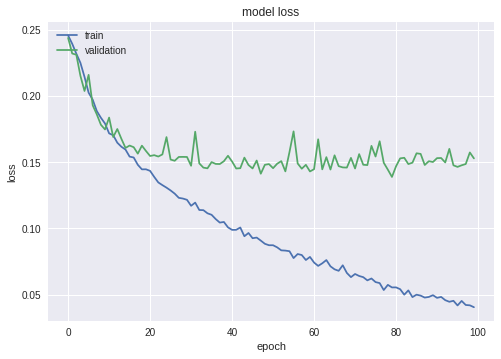

Test loss: 0.15285820579528808
Test accuracy: 0.81


In [14]:
model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=64,input_shape=(64, 64, 1),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
model.add(Conv2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(2,2),filters=64,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
model.add(Conv2D(kernel_size=(2,2),filters=32,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(2,2),filters=32,activation="relu",padding="same"))
model.add(Flatten())
model.add(Dropout(0.935))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr=0.0003),
              metrics=['accuracy'])

x_train = x_train.reshape((x_train.shape)[0],(x_train.shape)[1],(x_train.shape)[2],1)
x_test = x_test.reshape((x_test.shape)[0],(x_test.shape)[1],(x_test.shape)[2],1)

X = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),shuffle=True)

plt.plot(X.history['loss'])
plt.plot(X.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])